In [ ]:
# Muhammad Ahmad Hesham Mahmoud Sec:2 BN: 16
# Muhammad Alaa AbdelKhaleq Sec: 2 BN: 22

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
def Init_Graph(Nodes):
    #takes nodes in the list format , for example [1,3,5,7,9] and initializes a directed graph
    G = nx.DiGraph()
    G.add_nodes_from(Nodes)
    return G

In [2]:
def Add_Edges(G,Edge, Weight=1):
    #takes an initialized graph 
    #and an edge or edge list in the list of tubles(start,end) form, for example [(1,5), (7,9), (1,9)]
    #and a shared weigh, by default 1
    G.add_edges_from(Edge, weight=Weight)

In [3]:
def Get_Nodes(G):
    #returns the list of nodes
    return list(G.nodes)

In [4]:
def Get_Edges(G):
    #returns a dictionary of Edges and their weights
    #for example:{(1, 5): 3, (1, 9): 3, (7, 9): 3}
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    return edge_labels

In [5]:
def Get_Out_Nodes(G,Node):
    #return a list of all the directly connected nodes out from a given node, for example [3,5]
    #the directly connected nodes [A,B] , mean that there is an edge starts from 'A' and ends at 'B'
    #i.e the incoming nodes towards 'Node' are not listed here
    #if there isnt any, the list will be empty []
    
    return list(G.adj[Node])

In [6]:
def Get_Out_Edges(G,Node):
     #return a dictionary of all the directly connected edges out from a given node and their weights
    nodeslist=Get_Out_Nodes(G,Node)
    edgesdic={}
    edge_labels=Get_Edges(G)
    for item in nodeslist:
        edgesdic[((Node,item))]=edge_labels[(Node,item)]
    return edgesdic

In [7]:
def Print_Graph(G,red_edges=[]):
    #takes a graph and a list of red edges
    plt.figure(figsize=(5,5))
    edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
    pos = nx.planar_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos,font_weight='bold')
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G,pos, with_labels=True, font_weight='bold',edge_color=edge_colors,arrowsize=30,node_color='#00b4d9', node_size=900)

[4, 6, 8, 10, 14]
{(4, 10): 7, (6, 8): 4, (6, 14): 4, (6, 4): 10, (8, 4): 2, (8, 10): 6, (8, 14): 5}
[8, 14, 4]
{(6, 8): 4, (6, 14): 4, (6, 4): 10}


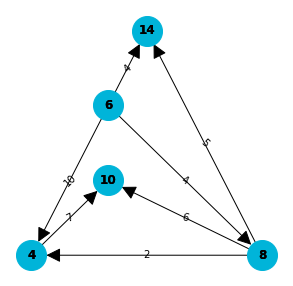

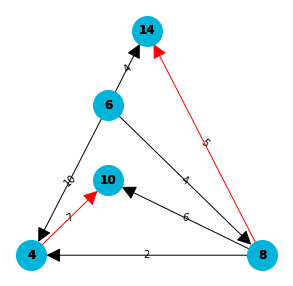

In [8]:
G1=Init_Graph([4,6,8,10,14])
Add_Edges(G1,[(8,4)],2)
Add_Edges(G1,[(6,8), (6,14)],4)
Add_Edges(G1,[(8,10)],6)
Add_Edges(G1,[(8,14)],5)
Add_Edges(G1,[(6,4)],10)
Add_Edges(G1,[(4,10)],7)
print(Get_Nodes(G1))
print(Get_Edges(G1))
print(Get_Out_Nodes(G1,6))
print(Get_Out_Edges(G1,6))
Print_Graph(G1)
Print_Graph(G1,[(8,14),(4,10)])

In [83]:
def dijkstra(G, source):
    # pseudocode implementation of dijkstra algorithm http://www.gitta.info/Accessibiliti/en/html/Dijkstra_learningObject1.html:
    dist = {}
    previous = {}
    for vertex in Get_Nodes(G):
        dist[vertex] = float('inf')
        previous[vertex] = None
    dist[source] = 0
    previous[source] = source
    unvisited_nodes = Get_Nodes(G)
    while len(unvisited_nodes) > 0:
        min_node = None
        for node in unvisited_nodes:
            if min_node is None:
                min_node = node
            elif dist[node] < dist[min_node]:
                min_node = node
        unvisited_nodes.remove(min_node)
        for neighbor in Get_Out_Nodes(G,min_node):
            alt = dist[min_node] + Get_Edges(G)[(min_node,neighbor)]
            if alt < dist[neighbor]: # edge relaxation
                dist[neighbor] = alt
                previous[neighbor] = min_node
    return dist, previous

def draw_shortest_path_tree(G,source,draw=True):
    #to do: 1) print the graph with shortest path tree edges on red
    #2) return a list of tupels: (total distance, node, direct parent)
    dist, previous = dijkstra(G, source)
    if draw:
        Print_Graph(G,[(previous[node], node) for node in Get_Nodes(G)])
    
    return sorted([(dist[node], node,  previous[node]) for node in Get_Nodes(G)])

[(0, 6, 6), (4, 8, 6), (4, 14, 6), (6, 4, 8), (10, 10, 8)]

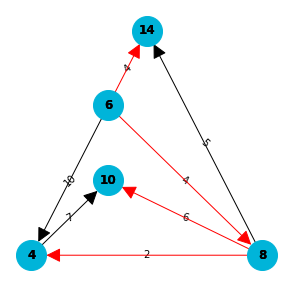

In [63]:
draw_shortest_path_tree(G1,6)

In [71]:
def Flooding(G,maxhop,source):
    if maxhop==0: return 0
    return sum([Flooding(G,maxhop-1,node) for node in Get_Out_Nodes(G,source)]) + len(Get_Out_Nodes(G,source))

In [72]:
print(Flooding(G1,3,6))
print(Flooding(G1,3,4))

8
1


In [73]:
def rpf_flodding(G,source_node,from_node,middle_node):
    #to do
    #given a graph, and applying the rpf floding 
    # a middle_node recieves a packet from it's direct neighbour from_node
    #the packet initiator is the source_node
    #your task is to decide as a middle_node, to forward the packet further or not
    #and if will forward, to which nodes 
    #return a list of forwarding nodes, and can be empty
    if from_node==middle_node:
        return []
    _, previous = dijkstra(G1,source_node)
    if previous[middle_node] == from_node:
        return Get_Out_Nodes(G,middle_node)
    else:
        return []
        
    
  

8
[]
[4, 10, 14]
[]


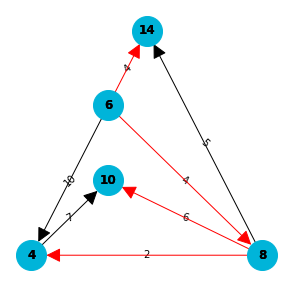

In [76]:
#testing 
draw_shortest_path_tree(G1,6)
print(Flooding(G1,3,6))
print(rpf_flodding(G1,6,6,4))
print(rpf_flodding(G1,6,6,8))

({4: 6, 6: 0, 8: 4, 10: 10, 14: 4, 15: 12}, {4: 8, 6: 6, 8: 6, 10: 8, 14: 6, 15: 10})
[]


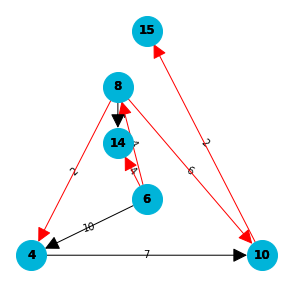

In [87]:
G2=Init_Graph([4,6,8,10,14, 15])
Add_Edges(G2,[(8,4)],2)
Add_Edges(G2,[(6,8), (6,14)],4)
Add_Edges(G2,[(8,10)],6)
Add_Edges(G2,[(8,14)],5)
Add_Edges(G2,[(6,4)],10)
Add_Edges(G2,[(4,10)],7)
Add_Edges(G2,[(10,15)],2)
draw_shortest_path_tree(G2,6)
print(dijkstra(G2, 6))
print(rpf_flodding(G2,6,4,10))